In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
sns.set(style="whitegrid")

# 1. Binary Classification

## 1.1. Implementation from Stratch

In [10]:
x1 = np.random.normal(-1, 1, 100)
x2 = np.random.normal(1, 1, 100)

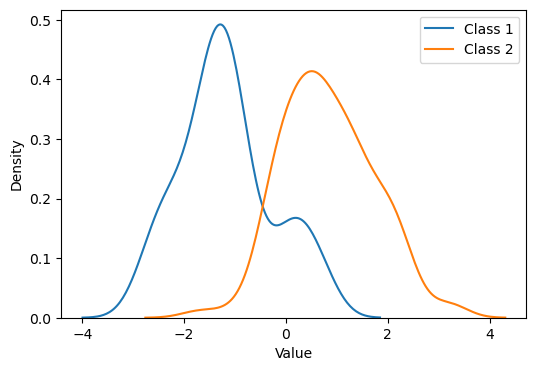

In [11]:
plt.figure(figsize=(6, 4))
sns.kdeplot(x1, label='Class 1')
sns.kdeplot(x2, label='Class 2')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [12]:
train_size = 50

x1_train = x1[:train_size]
x2_train = x2[:train_size]

x1_test = x1[train_size:]
x2_test = x2[train_size:]

k = 5

In [13]:
error1 = 0
error2 = 0

# classify each instance of x1_test
for i in range(len(x1_test)):
    
    # calculate the distance between an x1_test instance to 
    # all the instances in x1_train and x2_train
    x1_diff = np.abs(x1_train - x1_test[i])
    x2_diff = np.abs(x2_train - x1_test[i])
    
    # sort the distance to get the nearest points
    x1_diff = np.sort(x1_diff)
    x2_diff = np.sort(x2_diff)
    
    # find the classes
    x_diff = x1_diff - x2_diff
    x_diff = np.sign(x_diff)
    x_diff = x_diff[:k]
    
    # count missclassified instances
    if sum(x_diff) > 0:
        error1 += 1



# classify each instance of x1_test
for i in range(len(x2_test)):
    
    # calculate the distance between an x1_test instance to 
    # all the instances in x1_train and x2_train
    x1_diff = np.abs(x1_train - x2_test[i])
    x2_diff = np.abs(x2_train - x2_test[i])
    
    # sort the distance to get the nearest points
    x1_diff = np.sort(x1_diff)
    x2_diff = np.sort(x2_diff)
    
    # find the classes
    x_diff = x1_diff - x2_diff
    x_diff = np.sign(x_diff)
    x_diff = x_diff[:k]
    
    # count missclassified instances
    if sum(x_diff) < 0:
        error2 += 1

print('error1: ', error1)
print('error2: ', error2)
print('error: ', error1 + error2)

error1:  5
error2:  6
error:  11


## 1.2. Use sklearn

In [19]:
from sklearn.neighbors import KNeighborsClassifier

X_train = np.concatenate([x1_train, x2_train]).reshape(-1,1)
X_test  = np.concatenate([x1_test, x2_test]).reshape(-1,1)

y_train = np.concatenate([np.full(50, -1), np.full(50, 1)])
y_test = np.concatenate([np.full(50, -1), np.full(50, 1)])

knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

error1 = sum(y_pred[:50] == 1)
error2 = sum(y_pred[50:] == -1)

print('error1: ', error1)
print('error2: ', error2)
print('error: ', error1 + error2)

error1:  5
error2:  6
error:  11
